In [1]:
import zfit

/Users/mariehartmann/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/zfit/__init__.py:48: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn("TensorFlow warnings are by default suppressed by zfit."
/Users/mariehartmann/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/zfit/util/execution.py:73: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


In [2]:
import tensorflow as tf

In [3]:
from zfit import z

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [55]:
import mplhep

## Définir une PDF - model

Définir l'espace observable 

In [6]:
obs = zfit.Space('x', limits=(-10,10))

In [7]:
print(obs)
print(obs.limits)

<zfit Space obs=('x',), axes=None, limits=(array([[-10.]]), array([[10.]]))>


<ipython-input-7-657e9309e113>:2: UserWarning: The function <function Space.limits at 0x15223a700> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[-10.]]), array([[10.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  print(obs.limits)


(array([[-10.]]), array([[10.]]))


Définir les paramètres de la fonction de densité de probabilité (pdf)

In [8]:
mu = zfit.Parameter('mu', 2.4, -1, 5)
#le nom du paramètre, sa valeur, ses limites

In [9]:
sigma = zfit.Parameter('sigma', 1.3, 0, 5)

In [13]:
print(mu)
print(mu.value)
print(sigma)

<zfit.Parameter 'mu' floating=True value=2.4>
<bound method Parameter.value of <zfit.Parameter 'mu' floating=True value=2.4>>
<zfit.Parameter 'sigma' floating=True value=1.3>


Initialiser la gausienne avec les paramètres

In [14]:
gauss = zfit.pdf.Gauss(obs=obs, mu=mu, sigma=sigma)

AttributeError: 'Gauss' object has no attribute 'values'

## Créer le dataset que l'on veut fitter - data

In [19]:
#use Data.from_numpy for simplicity
data_np = np.random.normal(0,1, size = 10000)
data = zfit.Data.from_numpy(obs=obs, array=data_np)
#on remplit 'x' et 'y'

In [42]:
print(data)
print(data.value())
print('   ')
print(data.value()[0])
print('   ')
print(data.value()[:,0]) 
#je manipule des Tensor tensorflow, c'est comme un array?
print('   ')
print(zfit.run(data.value()[:,0]))
#transforme en liste l'objet TF

<zfit.Data: Data obs=('x',)>
tf.Tensor(
[[ 0.32271228]
 [ 1.24940311]
 [-1.80271093]
 ...
 [-0.5609349 ]
 [ 1.08201015]
 [ 0.14138166]], shape=(10000, 1), dtype=float64)
   
tf.Tensor([0.32271228], shape=(1,), dtype=float64)
   
tf.Tensor(
[ 0.32271228  1.24940311 -1.80271093 ... -0.5609349   1.08201015
  0.14138166], shape=(10000,), dtype=float64)
   
[ 0.32271228  1.24940311 -1.80271093 ... -0.5609349   1.08201015
  0.14138166]


## Faire un maximum likelihood fit

Stage 1 : create a loss function

In [24]:
nll = zfit.loss.UnbinnedNLL(model=gauss, data=data)

In [29]:
print(nll)
print('  ')
print(nll.data)

<UnbinnedNLL model=[<zfit.<class 'zfit.models.dist_tfp.Gauss'>  params=[mu, sigma]] data=[<zfit.core.data.Data object at 0x156a50ca0>] constraints=[]>
  


Stage 2 : instancier un minimiseur

In [30]:
minimizer = zfit.minimize.Minuit()
#ici basic minimizer

Stage 3 : minimiser la loss function

In [31]:
result = minimizer.minimize(nll) #paramètres fixés

In [32]:
result2 = minimizer.minimize(nll, params=[mu]) #mu varie

Estimer les erreurs sur le fit

In [33]:
param_errors, _ = result.errors()
print(param_errors)

/Users/mariehartmann/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:1097: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn("'minuit_minos' will be changed as the default errors method to a custom implementation"


OrderedDict([(<zfit.Parameter 'mu' floating=True value=0.00814>, {'lower': -0.009989816444506973, 'upper': 0.009992584176584987, 'is_valid': True, 'upper_valid': True, 'lower_valid': True, 'at_lower_limit': False, 'at_upper_limit': False, 'nfcn': 12, 'original': <MError number=0 name='mu' lower=-0.009989816444506973 upper=0.009992584176584987 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=12 min=0.00813908288074039>, 'cl': 0.68268949}), (<zfit.Parameter 'sigma' floating=True value=0.9991>, {'lower': -0.007011214013711303, 'upper': 0.007118555225377248, 'is_valid': True, 'upper_valid': True, 'lower_valid': True, 'at_lower_limit': False, 'at_upper_limit': False, 'nfcn': 20, 'original': <MError number=1 name='sigma' lower=-0.007011214013711303 upper=0.007118555225377248 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=Fals

Examiner les résultats du fit

In [34]:
print(result)

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.dist_tfp.Gauss'>  params=[mu, sigma]] data=[<zfit.core.data.Data object at 0x156a50ca0>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 1.5e-06 │ -1.651e+04  │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name       value         minuit_minos    at limit
------  --------  -------------------  ----------
mu      0.008139  -   0.01   +   0.01       False
sigma     0.9991  -  0.007   + 0.0071       False


In [35]:
print(result.params)

name       value         minuit_minos    at limit
------  --------  -------------------  ----------
mu      0.008139  -   0.01   +   0.01       False
sigma     0.9991  -  0.007   + 0.0071       False


In [36]:
print(result.params[mu]['value'])

0.00813908288074039


In [37]:
print(result.params[sigma]['value'])

0.9990815407276301


## Plotter un fit avec maptplotlib

In [50]:
lower, upper = obs.limits
data_list = zfit.run(data.value()[:,0])
print(upper[0][0])
print(lower[0][0])
print(data_list)

10.0
-10.0
[ 0.32271228  1.24940311 -1.80271093 ... -0.5609349   1.08201015
  0.14138166]


Faire l'histogramme des données

ValueError: too many values to unpack (expected 2)

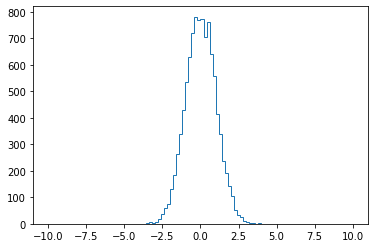

In [65]:
range = (lower[0][0],upper[0][0])
counts, bin_edges = plt.hist(data_list, bins = 100, range = range, histtype='step')
plt.show()

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

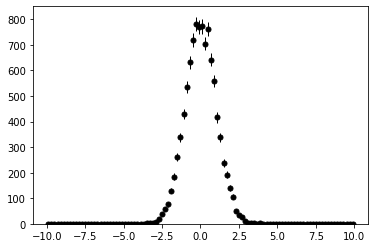

In [67]:
range = (lower[0][0],upper[0][0])
#les datas
counts, bin_edges = np.histogram(data_list, bins = 100, range = range)
mplhep.histplot((counts,bin_edges), yerr = True, color = 'black', histtype='errorbar')
## d'où viennent les erreurs ?

Tracer la courbe et faire le plot (à partir de l'histogramme)

In [68]:
#la courbe théorique
x_plot = np.linspace(lower[0][0], upper[0][0], num=1000)

In [75]:
#print(gauss.pdf(x_plot, norm_range=obs))
y_plot = zfit.run(gauss.pdf(x_plot, norm_range=obs))

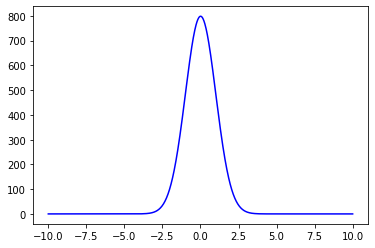

In [77]:
plt.plot(x_plot, y_plot*data_list.shape[0]/100*obs.area(), color='blue')
plt.show()

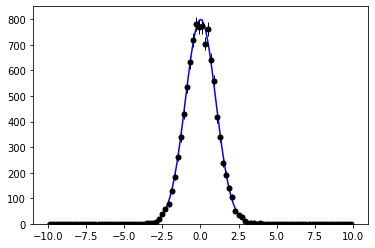

In [78]:
mplhep.histplot((counts,bin_edges), yerr = True, color = 'black', histtype='errorbar')
plt.plot(x_plot, y_plot*data_list.shape[0]/100*obs.area(), color='blue')
plt.show()